project: https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning/supplement/weL1U/project-overview  
dataset: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy import stats
from datetime import datetime

**Dataset** 
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**Objective of Notebook:**  
This notebook aims to explore and preprocess the data set for regression models.

**Data Set Description**  
There are 21 variables in this data set:
- 3 categorical variables (waterfront, view, condition),
- 16 continuous variables,
- 1 variable to store house ID (Id)
- 1 variable to store date house sold (date)

**Structure of the data set**:  
<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Id</b></td>
<td>House ID</td>
<td>7129300520; ...</td>
</tr>
<tr>
<td><b>date</b></td>
<td>Date house sold</td>
<td>20141013T000000; 20141209T000000; ...</td>
</tr>
<tr>
<td><b>price</b></td>
<td>House price</td>
<td>221900; 538000; ...</td>
</tr>
<tr>
<td><b>bedrooms</b></td>
<td>Number of bedrooms</td>
<td>3; 2; ...</td>
</tr>
<tr>
<td><b>bathrooms</b></td>
<td>Number of bathrooms</td>
<td>1; 2.25; ...</td>
</tr>
<tr>
<td><b>sqft_living</b></td>
<td>Living room size <br> (in sqft) </td>
<td>1180; 2570</td>
</tr>
<tr>
<td><b>sqft_lot</b></td>
<td>Lot size <br> (in sqft) </td>
<td>5650; 7242; ...</td>
</tr>
<tr>
<td><b>floors</b></td>
<td>Number of floors</td>
<td>1; 2; ...</td>
</tr>
<tr>
<td><b>waterfront</b></td>
<td>Has access to waterway <br> (0 = no; 1 = yes)</td>
<td>0; 1; ...</td>
</tr>
<tr>
<td><b>view</b></td>
<td>View</td>
<td>0; 2; ...</td>
</tr>
<tr>
<td><b>condition</b></td>
<td>House condition <br> (1 = bad; 5 = perfect)</td>
<td>1; 5; ...</td>
</tr>
<tr>
<td><b>grade</b></td>
<td>House grade</td>
<td>7; 6; ...</td>
</tr>
<tr>
<td><b>sqft_above</b></td>
<td>Above size <br> (in sqft)</td>
<td>1180; 2170; ...</td>
</tr>
<tr>
<td><b>sqft_basement</b></td>
<td>Basement size <br> (in sqft)</td>
<td>0; 400; ...</td>
</tr>
<tr>
<td><b>yr_built</b></td>
<td>Year when house was built</td>
<td>1955; 1951; ...</td>
</tr>
<tr>
<td><b>yr_renovated</b></td>
<td>Year when house was renovated</td>
<td>0; 1991; ...</td>
</tr>
<tr>
<td><b>zipcode</b></td>
<td>House zipcode</td>
<td>98178; 98125; ...</td>
</tr>
<tr>
<td><b>lat</b></td>
<td>House latitude</td>
<td>47.5112; 47.721; ...</td>
</tr>
<tr>
<td><b>long</b></td>
<td>House longitude</td>
<td>-122.257; -122.319; ...</td>
</tr>
<tr>
<td><b>sqft_living15</b></td>
<td>Living15 <br> (in sqft)</td>
<td>1340; 1690; ...</td>
</tr>
<tr>
<td><b>sqft_lot15</b></td>
<td>Lot15 <br> (in sqft)</td>
<td>5650; 7639; ...</td>
</tr>
</tbody>
</table>

Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.

In [3]:
data = pd.read_csv("./data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Below we can get more information about the data using the `info()` method

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

According to the output above, we have **21613 entries**, 0 to 21612, as well as **21 features**. The "Non-Null Count" column shows the number of non-null entries. In this dataset there is no null entry.  
Our target or response variable is 'price' and the rest of the features are our predictor variables.

We also have a mix of numerical (20 int64 or float64) and 1 object data type. 

The `describe()` function reveals the statistical information about the numeric attributes.

In [55]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.143600e+04,2.143600e+04,21436.000000,21436.000000,21436.000000,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,4.580765e+09,5.405293e+05,3.371571,2.117349,2082.704936,1.513564e+04,1.496198,0.007604,0.235118,3.410384,7.661737,1790.960440,291.744495,1971.098433,84.729800,98077.862288,47.560156,-122.213697,1988.314378,12785.961280
std,2.876590e+09,3.676893e+05,0.929205,0.769913,919.146469,4.153862e+04,0.540388,0.086871,0.767092,0.650235,1.174256,829.026491,442.781983,29.385277,402.431012,53.469371,0.138601,0.140896,685.699093,27375.467469
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,3.221500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000
75%,7.308675e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069625e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2370.000000,10087.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


For the "bedrooms", "sqft_living", "sqft_above", "sqft_basement", "sqft_living15" and "sqft_lot15" features, there is a big difference between the 75th percentile and the max value. This could indicate there may be some outliers and/or the data is not normally distributed. Will check for that in the next sections.  


The `value_counts()` method is used to check the frequency of each value.

In this dataset, 'condition' feature has type int64 but it has only 5 values so we can treat it like a categorical feature. The same for "view" and "grade".

In [6]:
data['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [7]:
data['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [8]:
data['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

### Correlations

Next, let's generate some pair plots to visually inspect the correlation between the features (excluding 'date') and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.

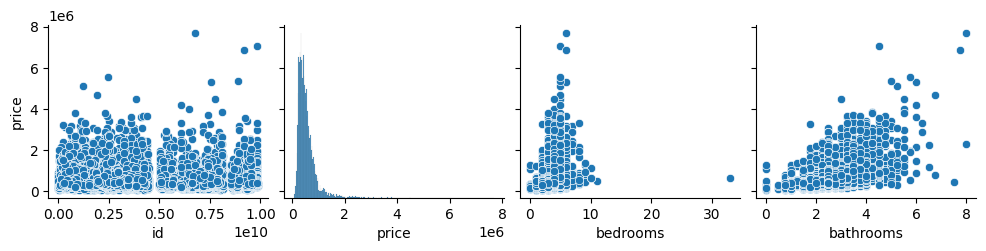

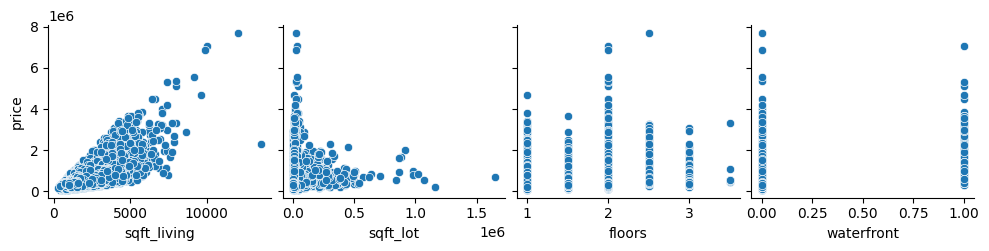

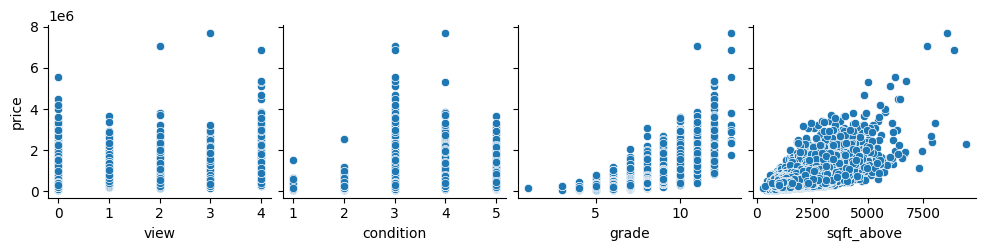

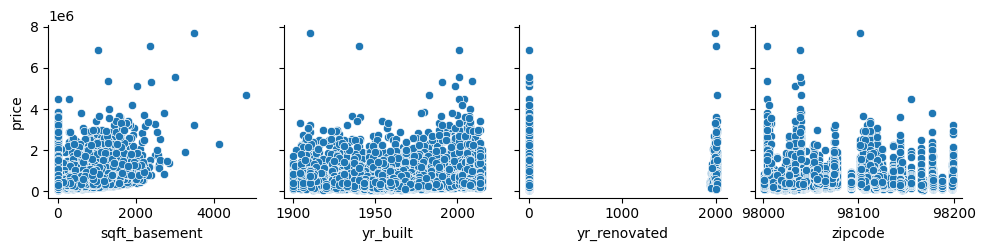

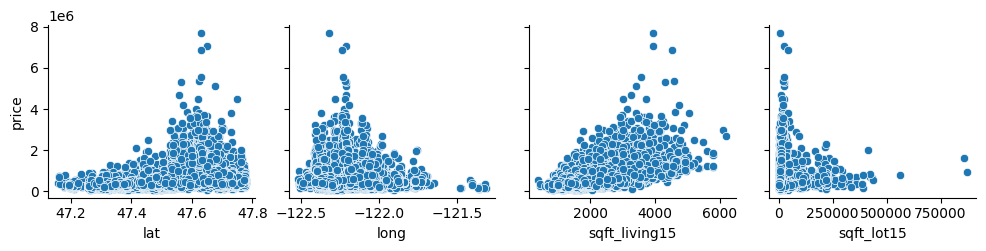

In [9]:
data_num = data.select_dtypes(include = ['float64', 'int64'])

n= 4
for i in range(0, len(data_num.columns), n):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+n],
                y_vars=['price'])

From the plots above we can draw some conclusions:
- there is a correlation between 'price' and 'bathrooms', 'sqft_living', 'sqft_above', 'grade', 'sqft_living15'
- there may be outliers in 'sqft_lot15', 'sqft_basement', 'sqft_above', 'sqft_lot', 'sqft_living' and 'bedrooms'

Correlations can also be calculated using the Pearson Correlation Coefficient:

In [ ]:
data_num_corr = data_num.corr()['price']
top_features = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There are 6 strongly correlated values with SalePrice:
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
Name: price, dtype: float64


The correlations calculated with the Pearson Correlation Coefficient corespond with the conclusions drawn from the pair plots.

### Log transformations

In this section, we are going to inspect whether our 'price' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis.  

The normal distribution assumption is important because:

- **It helps with accuracy**: When we assume the errors follow a normal distribution, the math behind the scenes works out better, and we get more accurate predictions.

- **Confidence in results**: It helps us create reliable confidence intervals and p-values. These tell us how sure we are about our predictions and whether our findings are significant or just happened by chance.  

Transforming features to be closer to a normal distribution can sometimes help, especially if:

- **Improving Model Fit**: Transformations like logarithmic, square root, or Box-Cox can stabilize variance and make relationships more linear, improving the overall fit of the model.

- **Reducing Skewness**: Highly skewed features can lead to less reliable estimates. Transforming them to be more normally distributed can improve the accuracy and interpretability of the regression coefficients.

- **Handling Outliers**: Transformations can mitigate the influence of outliers, making the model more robust.

In [12]:
def plotLogTransformed(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))
    sns.histplot(data=data, kde=True, ax=ax1)
    transformed = np.log(data)
    sns.histplot(data=transformed, kde=True, ax=ax2)

    plt.tight_layout()
    plt.show()

    print("Initial skewness: %f" % data.skew())
    print("Transformed column skewness: %f" % transformed.skew())

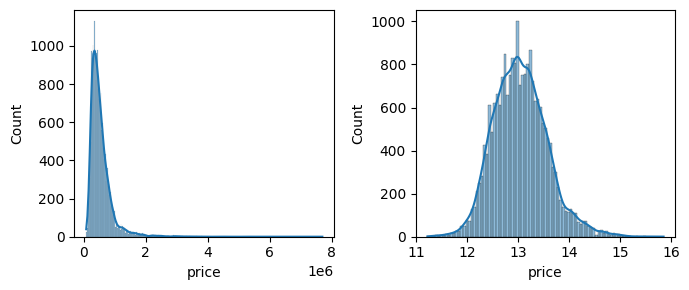

Initial skewness: 4.024069
Transformed column skewness: 0.428072


In [13]:
plotLogTransformed(data['price'])

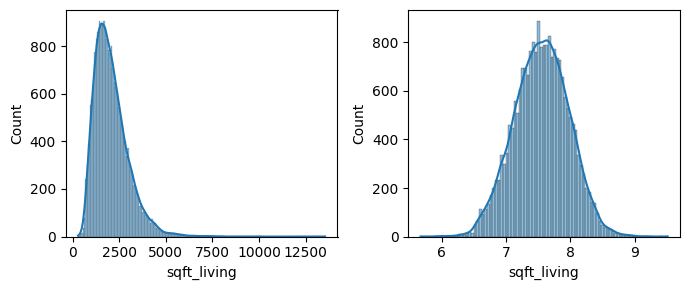

Initial skewness: 1.471555
Transformed column skewness: -0.035438


In [14]:
plotLogTransformed(data['sqft_living'])

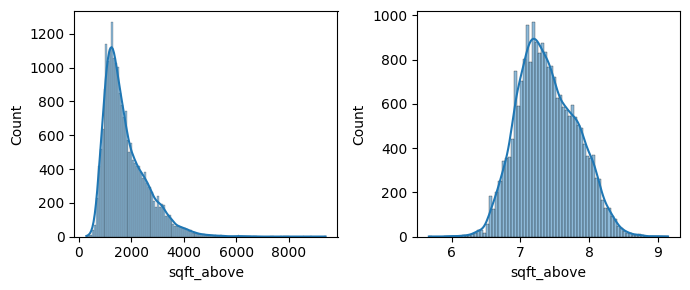

Initial skewness: 1.446664
Transformed column skewness: 0.253384


In [15]:
plotLogTransformed(data['sqft_above'])

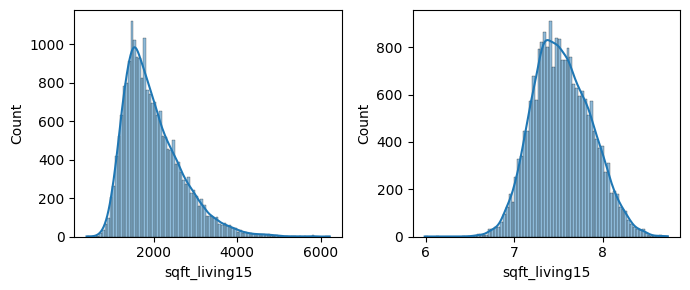

Initial skewness: 1.108181
Transformed column skewness: 0.206497


In [16]:
plotLogTransformed(data['sqft_living15'])

### Duplicates

Having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas `duplicated()` function and search by the 'Id' column, which contains a unique index number for each entry.

In [17]:
duplicated = data[data.duplicated(['id'])]
duplicated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,20150311T000000,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,20141229T000000,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,20150219T000000,645000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,20141201T000000,220000.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [18]:
data.drop_duplicates(['id'], inplace=True)

In [19]:
data.index.is_unique

True

### Missing Values

As we can see below, this dataset does not have any missing values.

In [21]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Feature Scaling

Feature scaling is important in many machine learning algorithms for a few key reasons:

- **Improving Model Performance**: Algorithms like Gradient Descent converge faster when features are scaled. It helps the algorithm reach the minimum loss more quickly, improving the efficiency of training.

- **Equal Weight**: Features with larger ranges can dominate the model’s decision-making process. Scaling ensures all features contribute equally to the model, leading to better performance.

- **Reducing Sensitivity**: Models like k-Nearest Neighbors (k-NN) and Support Vector Machines (SVM) are sensitive to the scale of features because they rely on distance measurements. Unscaled features can distort these distances and degrade model accuracy.

- **Consistency**: Features on different scales can lead to inconsistent behavior in tree-based algorithms, especially when making splits. Scaling ensures more consistent and reliable splits.

Common methods of feature scaling include:

- **Standardization**: Transforming features to have a mean of 0 and a standard deviation of 1.

- **Min-Max Scaling**: Rescaling features to a fixed range, typically [0, 1].

#### Min-Max Scaling
**Usage**: Scales the data to a fixed range, typically [0, 1] or [-1, 1].  

**Formula**:  
`𝑋scaled = (𝑋−𝑋min) / (𝑋max−𝑋min)`  

**When to Use**:  
- Algorithms Sensitive to Magnitude: Min-max scaling is particularly useful for algorithms that are sensitive to the absolute magnitude of the data, like **K-nearest neighbors and neural networks**.

- Bounded Features: When you have features with known boundaries, min-max scaling helps to maintain the original distribution.

- Uniformly Distributed Data: It works well when your data is uniformly distributed and does not contain significant outliers.   

#### Standard Scaling
**Usage**: Scales the data to have a mean of 0 and a standard deviation of 1.  
**Formula**:  
`𝑋scaled = (𝑋−𝜇) / 𝜎`  
where  
𝜇 is the mean and  
𝜎 is the standard deviation.   

**When to Use**:  
- Normally Distributed Data: Standard scaling is ideal when your data follows a normal distribution.

- Algorithms Sensitive to Mean and Standard Deviation: Algorithms like **linear regression, logistic regression, and support vector machines** often benefit from standard scaling.

- Presence of Outliers: Standard scaling is more robust to outliers since it centers the data around the mean and scales it based on standard deviation.  

**To summarize, use min-max scaling when you need the data to be within a specific range and the distribution of your data is uniform. Use standard scaling when your data is normally distributed, and when algorithms are sensitive to the mean and standard deviation of the data.**  


**Outliers**: If certain features contain outliers, using a method like standard scaling might be more appropriate for those columns, whereas min-max scaling might be better for features without outliers.

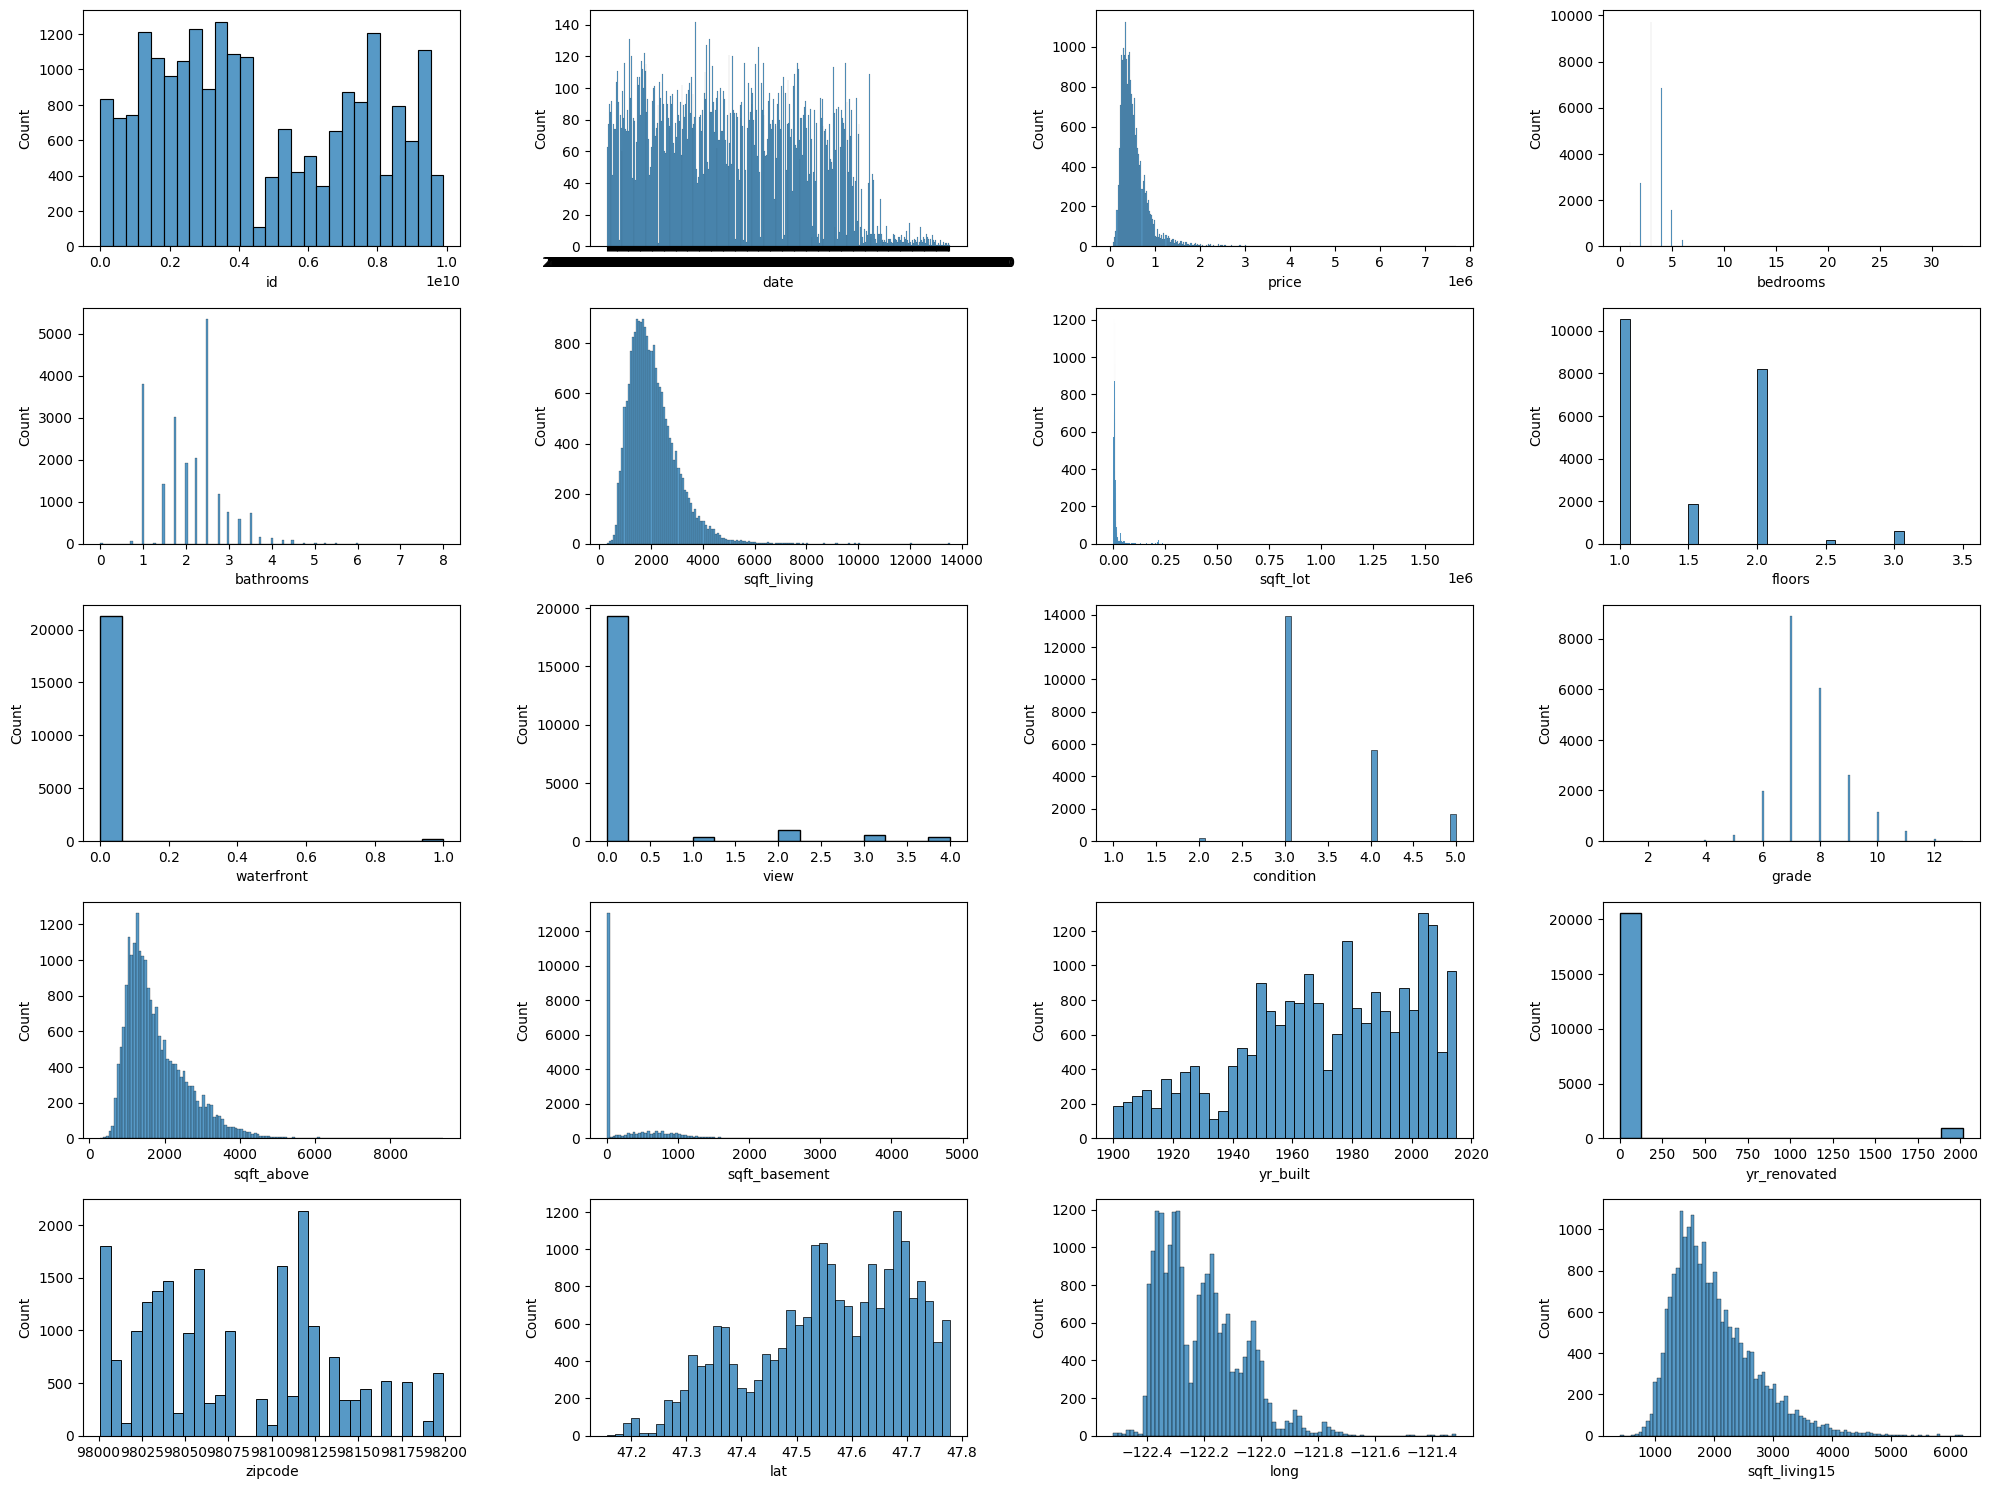

In [23]:
## plot distributions
fig, axes = plt.subplots(5, 4, figsize=(20,15))
for i, ax in enumerate(axes.flat):
    sns.histplot(data=data[data.columns[i]], ax=ax)

plt.tight_layout()
plt.show()

In [24]:
data_std_scaled = StandardScaler().fit_transform(data[['price', 'sqft_living', 'sqft_above', 'sqft_living15', 'lat', 'long']])
print(data_std_scaled)

[[-0.86659232 -0.98213508 -0.73697849 -0.94550147 -0.35322574 -0.30734733]
 [-0.00687903  0.53017277  0.4572211  -0.43506159  1.16050374 -0.74739853]
 [-0.98054988 -1.4282115  -1.231546    1.06709006  1.28243905 -0.13700494]
 ...
 [-0.37649047 -1.15621368 -0.92998044 -1.41218936  0.24707117 -0.60544653]
 [-0.38220467 -0.52517875 -0.23034836 -0.84341349 -0.18511375  1.02700145]
 [-0.58618599 -1.15621368 -0.92998044 -1.41218936  0.24490664 -0.60544653]]


### Outliers

An outlier is a data point that is significantly different from the other data points in a dataset. It stands out because it lies far away from the majority of values. Outliers can occur due to variability in the data or because of measurement errors.   

**Impact on Analysis**: Outliers can skew and mislead statistical analyses, affecting mean and standard deviation, and influencing the results of regression models and other analyses.

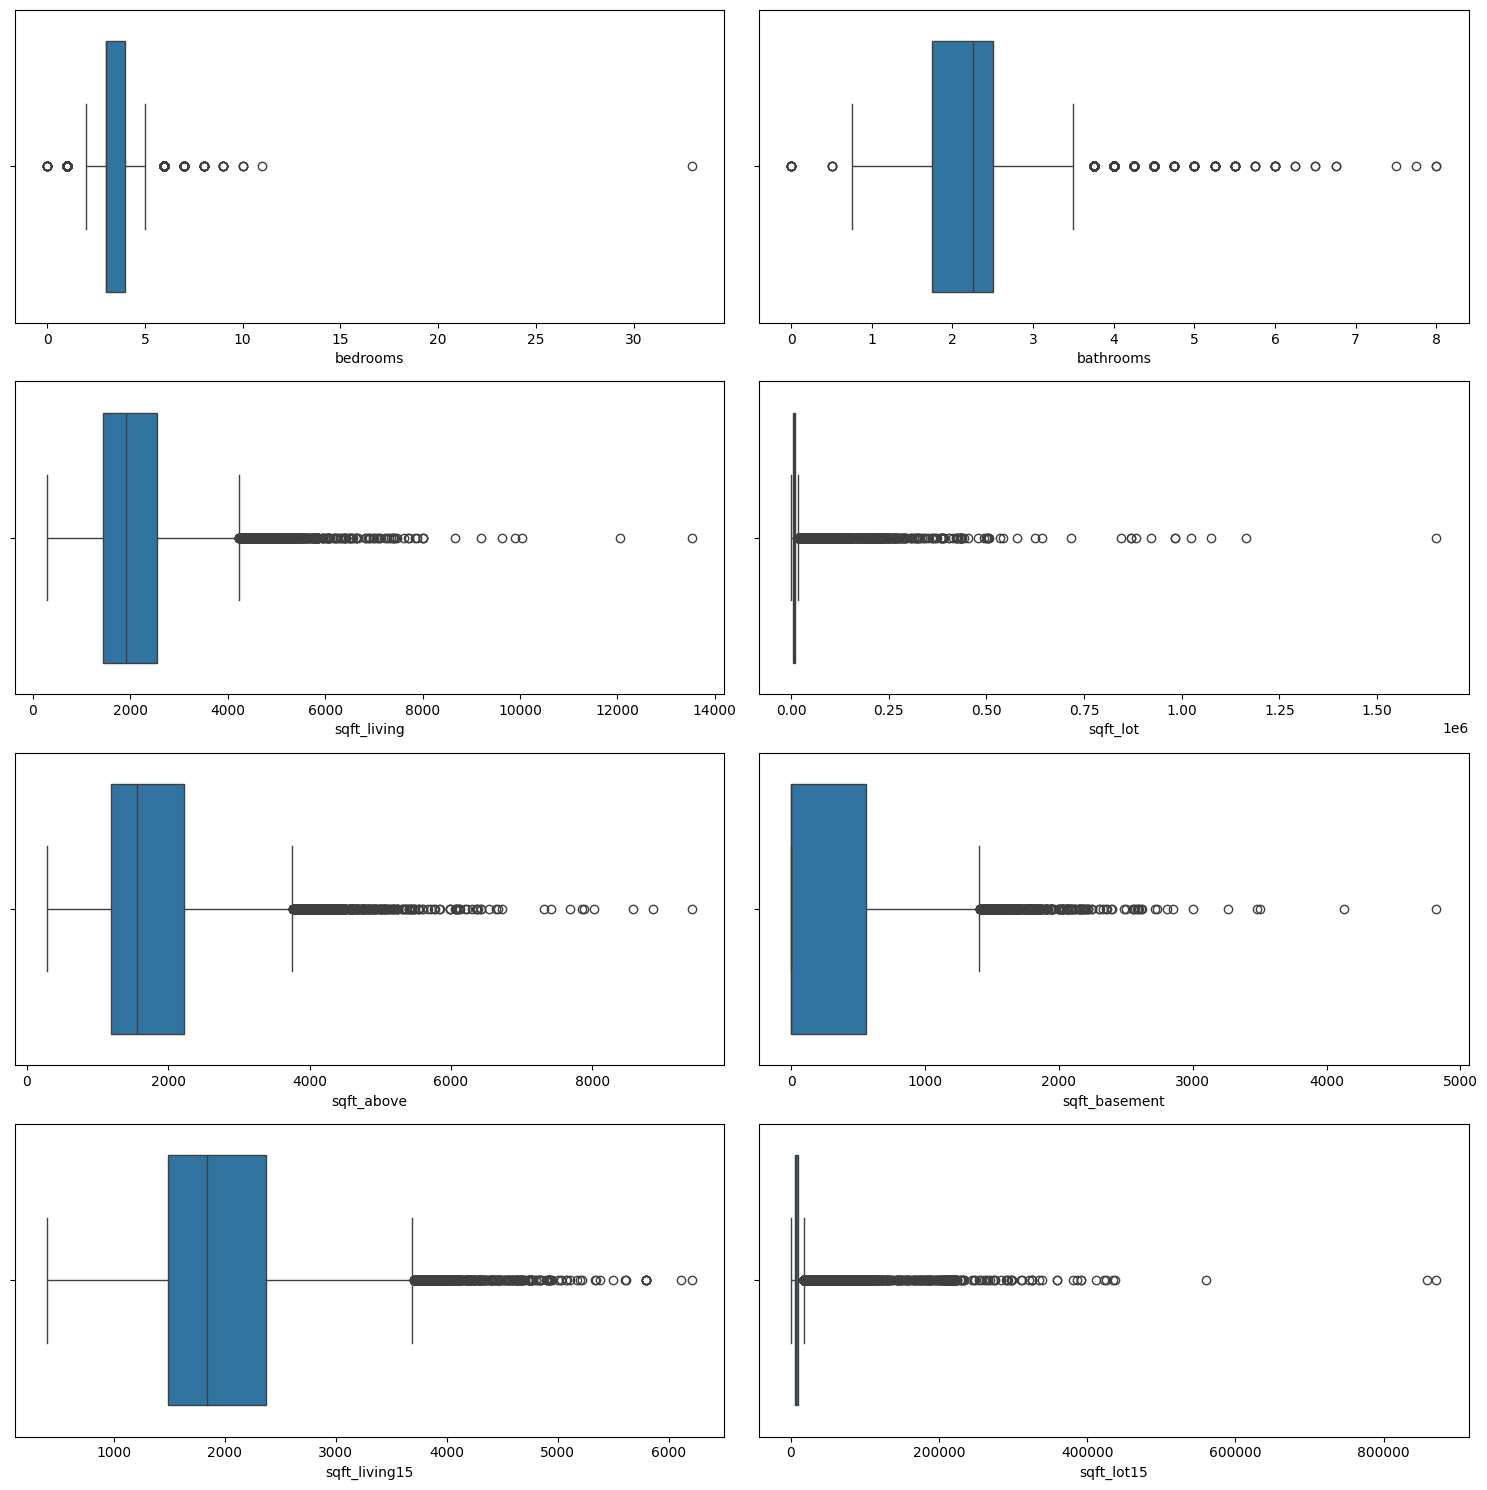

In [25]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
fig, axes = plt.subplots(4, 2, figsize=(15,15))
for i, ax in enumerate(axes.flat):
    sns.boxplot(x=data[columns[i]], ax=ax)

plt.tight_layout()
plt.show()

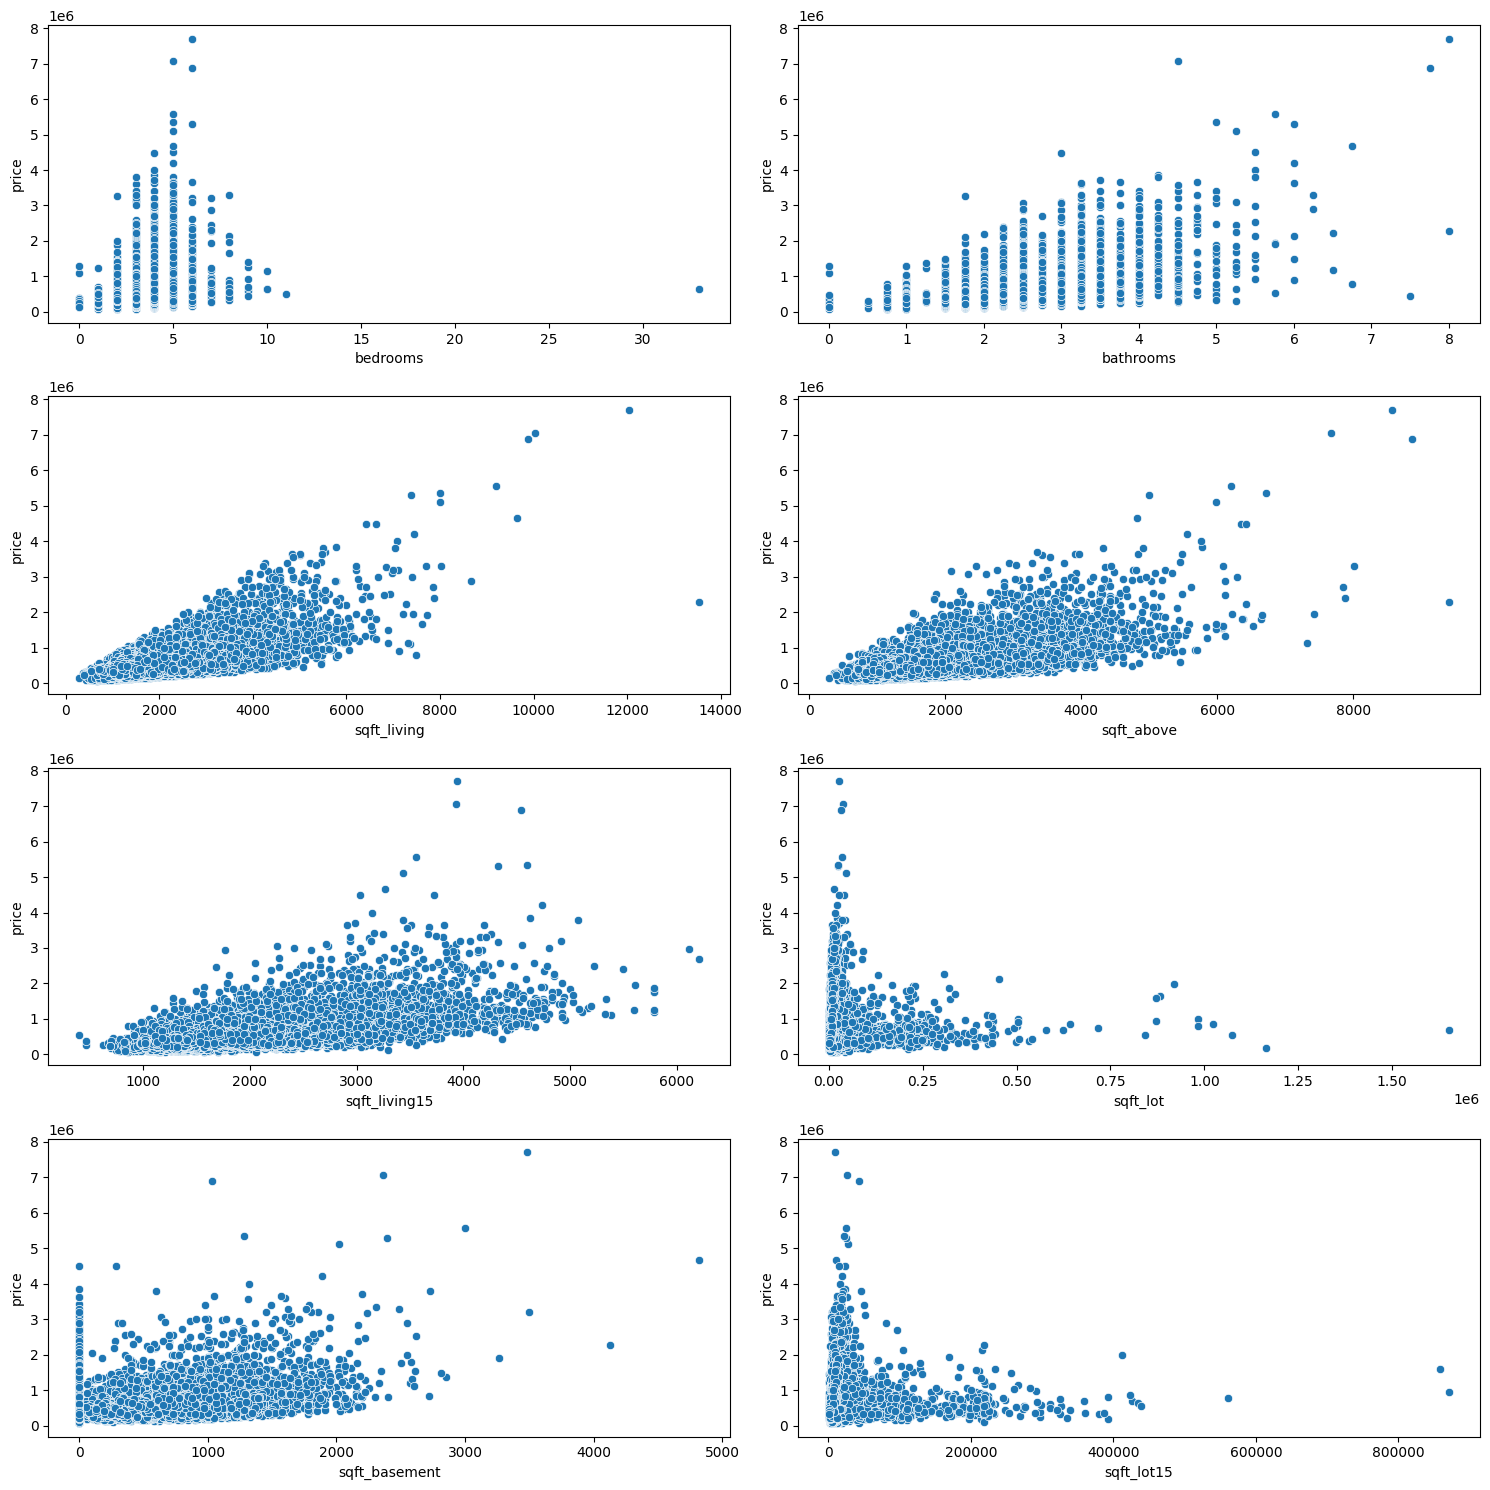

In [28]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot', 'sqft_basement', 'sqft_lot15']
fig, axes = plt.subplots(4, 2, figsize=(15,15))
for i, ax in enumerate(axes.flat):
    sns.scatterplot(x=data[columns[i]], y=data['price'], ax=ax)

plt.tight_layout()
plt.show()

From the above plots, we can see there are some data points that deviate from the rest of the population. We can delete those outliers.

In [29]:
data.sort_values(by='bedrooms', ascending=False)[:3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


In [30]:
clean_data = data.drop(data.index[[15870]])

In [31]:
data.sort_values(by='sqft_lot', ascending=False)[:2]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,20150327T000000,700000.0,4,1.0,1300,1651359,1.0,0,3,...,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
17319,3326079016,20150504T000000,190000.0,2,1.0,710,1164794,1.0,0,0,...,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730


In [32]:
clean_data.drop(data.index[[1719]], inplace=True)

In [33]:
data.sort_values(by='sqft_lot15', ascending=False)[:4]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9714,225079036,20150107T000000,937500.0,4,4.00,5545,871200,2.0,0,0,...,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
20452,1125079111,20150415T000000,1600000.0,4,5.50,6530,871200,2.0,0,2,...,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132
13464,3420069060,20141107T000000,790000.0,3,2.50,2640,432036,1.5,0,3,...,10,2640,0,1996,0,98022,47.1795,-122.036,1500,560617
8664,3226079059,20141019T000000,549950.0,3,1.75,2930,266587,2.0,0,0,...,8,2440,490,1995,0,98014,47.6991,-121.947,2700,438213


In [34]:
clean_data.drop(data.index[[9714, 20452]], inplace=True)

#### Z-score Analysis

Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [37]:
clean_data['sqft_lot15_zscore'] = stats.zscore(clean_data['sqft_lot15'])

In [38]:
clean_data[['sqft_lot15', 'sqft_lot15_zscore']].describe().round(3)

,sqft_lot15,sqft_lot15_zscore
count,21432.000,21432.000
mean,12787.478,0.000
std,27377.773,1.000
min,651.000,-0.443
25%,5100.000,-0.281
50%,7620.000,-0.189
75%,10088.250,-0.099
max,871200.000,31.355


<Axes: xlabel='sqft_lot15_zscore', ylabel='price'>

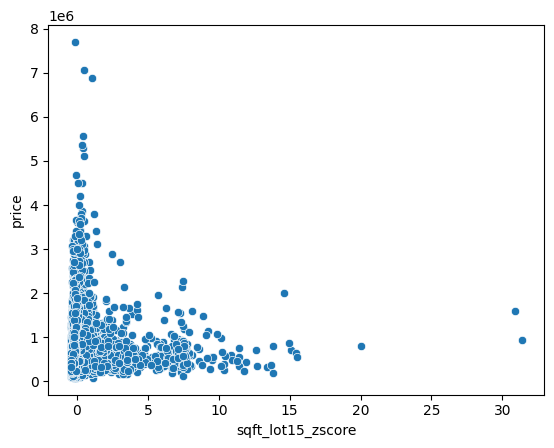

In [57]:
sns.scatterplot(x=clean_data['sqft_lot15_zscore'], y=data['price'])

In [39]:
clean_data.sort_values(by='sqft_lot15_zscore', ascending=False)[:7]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot15_zscore
9714,225079036,20150107T000000,937500.0,4,4.00,5545,871200,2.0,0,0,...,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200,31.355091
20452,1125079111,20150415T000000,1600000.0,4,5.50,6530,871200,2.0,0,2,...,6530,0,2008,0,98014,47.6640,-121.878,1280,858132,30.877758
13464,3420069060,20141107T000000,790000.0,3,2.50,2640,432036,1.5,0,3,...,2640,0,1996,0,98022,47.1795,-122.036,1500,560617,20.010477
8664,3226079059,20141019T000000,549950.0,3,1.75,2930,266587,2.0,0,0,...,2440,490,1995,0,98014,47.6991,-121.947,2700,438213,15.539447
3801,1550000463,20140826T000000,637000.0,4,3.50,3080,118918,2.0,0,0,...,3080,0,2008,0,98019,47.7721,-121.924,1830,434728,15.412151
1719,1020069017,20150327T000000,700000.0,4,1.00,1300,1651359,1.0,0,3,...,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,15.078040
19156,1020069042,20141001T000000,858000.0,4,3.50,4370,422967,1.0,0,2,...,2580,1790,1978,0,98022,47.2332,-122.029,3260,422967,14.982559


Based on boxplot and zscore, i'll delete the 3 datapoints that deviate the most from the rest of the population

In [40]:
clean_data.drop(clean_data.index[[9714, 20452, 13464]], inplace=True)

### Feature Transformation



#### Dealing with Categorical Variables


"View" and "condition" features have multiple unique values so we can one hot encode them.

In [41]:
clean_data['view'].value_counts()

view
0    19315
2      962
3      507
1      330
4      315
Name: count, dtype: int64

In [42]:
clean_data = pd.get_dummies(data=clean_data, columns=['view'])

In [43]:
clean_data['condition'].value_counts()

condition
3    13906
4     5644
5     1687
2      164
1       28
Name: count, dtype: int64

In [44]:
clean_data = pd.get_dummies(data=clean_data, columns=['condition'])

Calculating the time since the houses have been constructed or renovated can help accuracy for machine learning algorithms like decision trees

In [45]:
current_year = datetime.now().year
clean_data['age_built'] = current_year - clean_data['yr_built']
clean_data['age_renovated'] = clean_data['yr_renovated'].where(clean_data['yr_renovated'] == 0, current_year - clean_data['yr_renovated']) 

In [ ]:
clean_data[['yr_built', 'age_built', 'yr_renovated', 'age_renovated']]

,yr_built,age_built,yr_renovated,age_renovated
0,1955,70,0,0
1,1951,74,1991,34
2,1933,92,0,0
3,1965,60,0,0
4,1987,38,0,0
...,...,...,...,...
21608,2009,16,0,0
21609,2014,11,0,0
21610,2009,16,0,0
21611,2004,21,0,0


### Correlations

In [46]:
clean_data.drop(columns=['id', 'date'], axis=1, inplace=True)

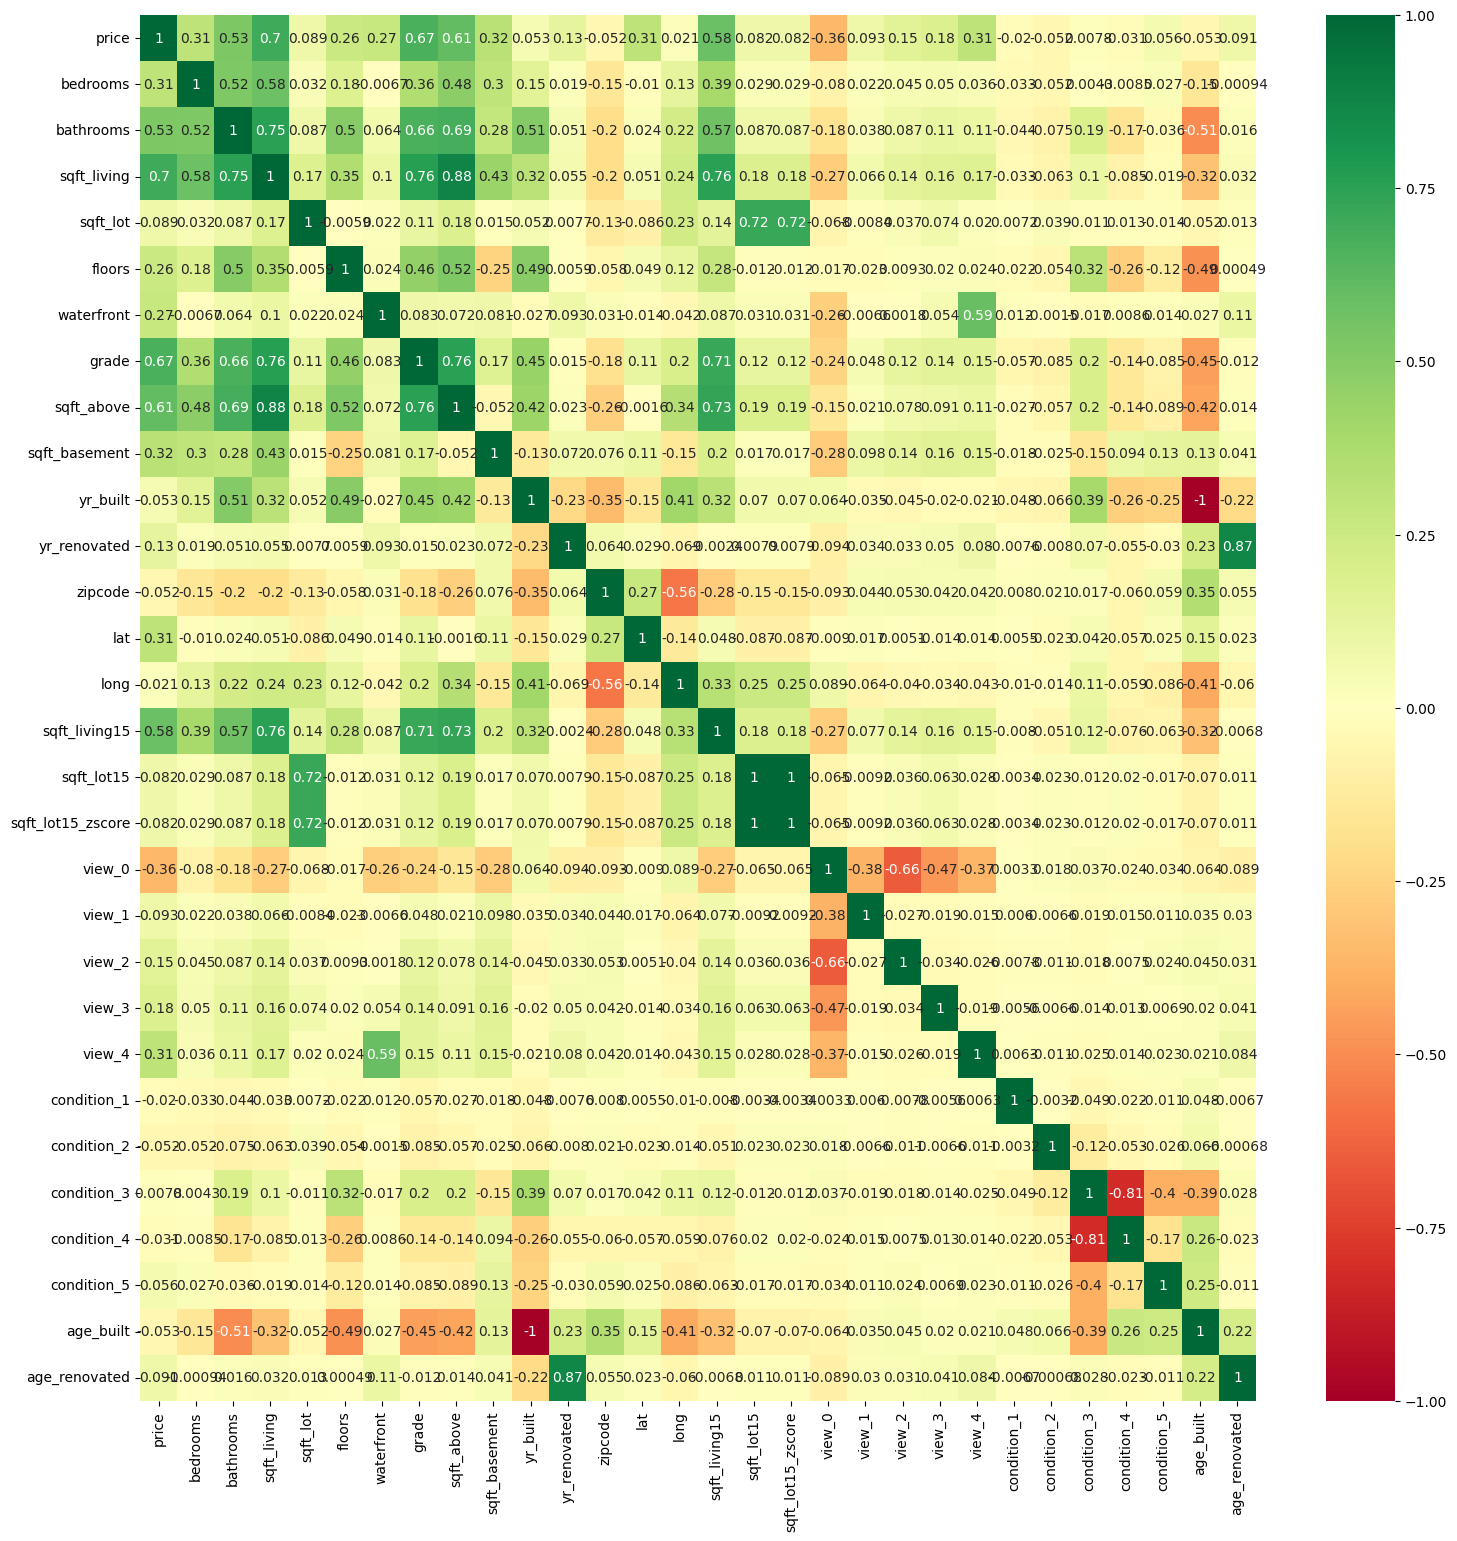

In [47]:
plt.figure(figsize=(18, 18))
sns.heatmap(clean_data.corr(),annot=True,cmap='RdYlGn')

plt.show()


In [48]:
features = clean_data.corr()['price'].sort_values()

<Axes: >

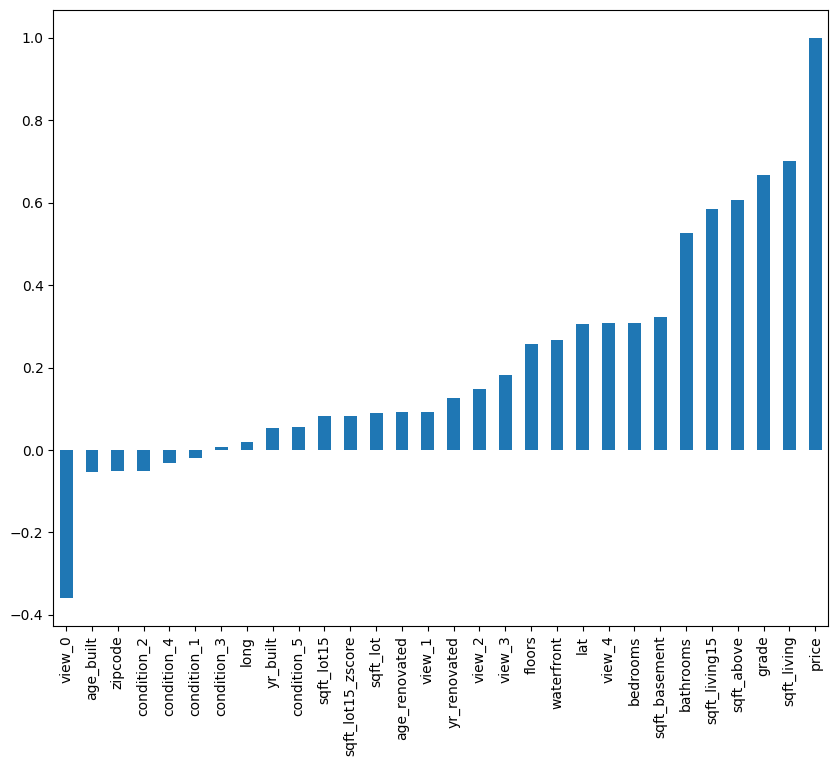

In [49]:
features.plot(kind='bar',figsize=(10,8))

From the graph above, we can deduct some of the highly correlated features (sqft_living, grade, sqft_above, sqft_living15, bathrooms) and select only those ones for any future analysis.

### Hypothesis Testing

Hypothesis 1 definition:

$ 𝐻_{0}:\mu_{1}<=\mu_{2} $ The average price of houses on waterfronts are less than or equal to prices of houses not on waterfronts. \
$ 𝐻_{A}:\mu_{1}>\mu_{2} $ The average price of houses on waterfronts are greater than prices of houses not on waterfronts.

Hypothesis 2 definition:

$ 𝐻_{0}:\mu_{1}=\mu_{2}=\mu_{3}=\mu_{4}=\mu_{5} $ The mean price of houses with different condition values (1-5) are the same. \
$ 𝐻_{A}: $ At least one of the means is different.  

Hypothesis 3 definition:

$ 𝐻_{0} $: Houses on waterfront proportions are not significantly different across the different grade values. \
$ 𝐻_{A} $: Houses on waterfront proportions are different across the different different grade values.

#### Hypothesis 1
In this example we will use the Hypothesis 1 to prove (or disprove) if the average price of houses on waterfronts is bigger than the average price of houses not on waterfronts.  

$ 𝐻_{0}:\mu_{1}<=\mu_{2} $ The average price of houses on waterfronts are less than or equal to prices of houses not on waterfronts. \
$ 𝐻_{A}:\mu_{1}>\mu_{2} $ The average price of houses on waterfronts are greater than prices of houses not on waterfronts.

The '>' sign in the alternate hypothesis indicates the test is right tailed. To compare the mean values of waterfront house and nonwaterfront house populations, we will use a t-test. If z-values (calculated from a t-test) fall into the area on the right side of a distribution curve, this would cause us to reject the null hypothesis.

First, we will compare the mean values (𝜇) of population of houses on waterfronts and those who are not on waterfronts. First, we need to calculate the mean values of both populations.

In [50]:
waterfront_data = clean_data.loc[clean_data.waterfront == 1]
waterfront_data.price.mean()

1661876.0245398772

In [51]:
no_waterfront_data = clean_data.loc[clean_data.waterfront == 0]
no_waterfront_data.price.mean()

531969.8395560989

<Axes: title={'center': 'price'}, xlabel='waterfront'>

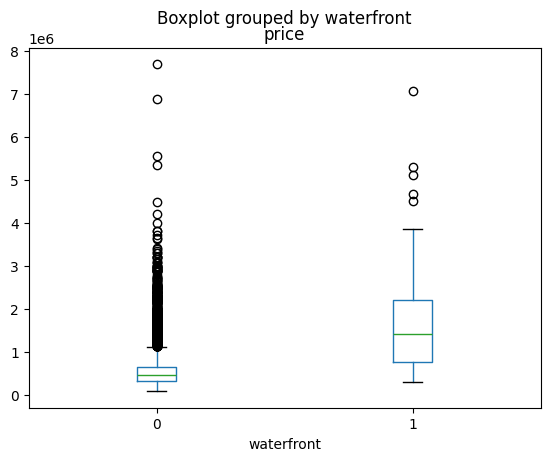

In [52]:
clean_data.boxplot(by='waterfront', column=['price'], grid=False)

We will calculate t-value and p-value of charges for waterfront and non-waterfront populations.


In [53]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(waterfront_data.price, no_waterfront_data.price)
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 40.55092950214794 , p_value =0.0 , p_value_onetail = 0.0


Conclusion: Since p_value 0.0 is less than alpha 0.05  
Reject null hypothesis that the average price of houses on waterfronts are greater than average prices of houses not on waterfronts